### Code to plot the most recent autonomous motion profile
#### 12/28/2019 CJH

In [3]:
import sys
import time
from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ip = '172.22.11.2'
ip = 'roboRIO-2429-FRC.local'
NetworkTables.initialize(server=ip)

False

In [5]:
def valueChanged(table, key, value, isNew):
    print("valueChanged: key: '%s'; value: %s; isNew: %s" % (key, value, isNew))
def connectionListener(connected, info):
    print(info, "; Connected=%s" % connected)

In [6]:
NetworkTables.addConnectionListener(connectionListener, immediateNotify=True)

In [7]:
sd = NetworkTables.getTable("SmartDashboard")

In [8]:
def get_data():
    # this was a lot simpler but stupid network tables can only take 256 values per array
    data_time = np.array(sd.getNumberArray('telemetry_time',0))
    data_position = np.array(sd.getNumberArray('telemetry_position',0))
    data_velocity = np.array(sd.getNumberArray('telemetry_velocity',0))
    data_current = np.array(sd.getNumberArray('telemetry_current',0))
    data_output = np.array(sd.getNumberArray('telemetry_output',0))
    data = np.column_stack((data_time,data_position,data_velocity,data_current,data_output))
    df = pd.DataFrame(data, columns =['time','position', 'velocity', 'current', 'output']).round(3)
    return df

In [9]:
def plot_df(df):
# multiple line plot
    save = False
    markersize = 3
    linewidth = 1.2
    colors=['blue', 'orange', 'green', 'red']
    label = "Mapping Smart Motion Profile on SparkMax"
    plt.figure(num=None, figsize=(10,6),dpi=100)
    for i in range(3):
        plt.plot( 'time', df.columns[i+1], data=df, marker='o', markerfacecolor=colors[i], markersize=markersize, color=colors[i], linewidth=1)
    #plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim(-1.1,1.1)
    plt.title(label)
    plt.xlabel('time (s)')
    plt.ylabel('inches, rpm/10, amps')
    if save:
        plt.ioff()
        plt.savefig(fname)
        plt.close()
    plt.show()

In [10]:
def plot_df2(df):
    # Make two dual-axis plots with the relevant information
    save = False
    markersize = 4
    linewidth = 1.2
    colors=['orange', 'blue', 'green', 'red','orange']
    label = "Mapping Smart Motion Profile on SparkMax"

    fig, ax1 = plt.subplots(figsize=(8,8),dpi=100)
    ax1=plt.subplot(211)
    index = 1
    #ax1.set_xlabel('time (s)')
    ax1.set_ylabel(df.columns[index], color=colors[index])
    ax1.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax1.tick_params(axis='y', labelcolor=colors[index])
    index = 2
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(df.columns[index], color=colors[index])  # we already handled the x-label with ax1
    ax2.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax2.tick_params(axis='y', labelcolor=colors[index])
    plt.title(label)
    
    ax3=plt.subplot(212)
    index = 3
    ax3.set_xlabel('time (s)')
    ax3.set_ylabel(df.columns[index], color=colors[index])
    ax3.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax3.tick_params(axis='y', labelcolor=colors[index])
    index = 4
    ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
    ax4.set_ylabel(df.columns[index], color=colors[index])  # we already handled the x-label with ax1
    ax4.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax4.tick_params(axis='y', labelcolor=colors[index])
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.ioff()
        plt.savefig(fname)
        plt.close()
    plt.show()

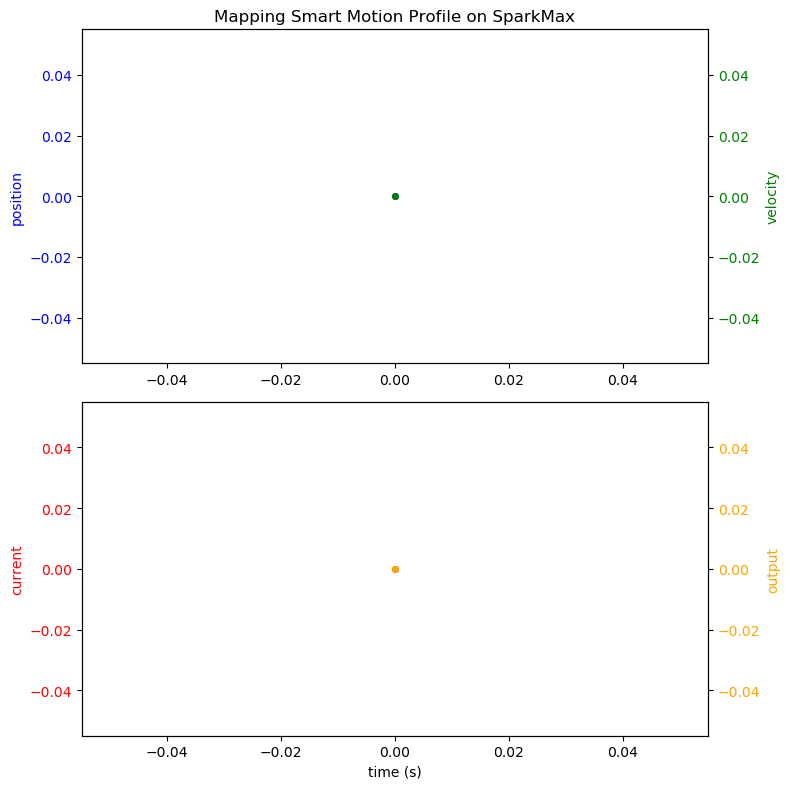

In [13]:
df=get_data()
plot_df2(df)

C:\Users\2429F\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


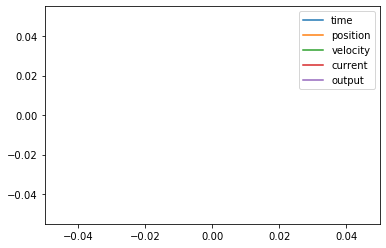

In [10]:
df.plot()

In [11]:
df.diff().describe()

,time,position,velocity,current,output
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True
